# Fashion MNIST Data Classification project

## step-1:- IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
import keras

## LOAD DATA

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


## PRINT THE SHAPE OF THE DATA 

In [3]:
X_train.shape,y_train.shape,"*****************",X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '*****************', (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","shirt","sneaker","Bag","Ankel boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'shirt',
 'sneaker',
 'Bag',
 'Ankel boot']

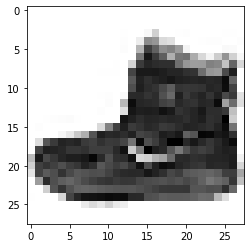

In [7]:
#displaying the image
plt.imshow(X_train[0],cmap='Greys')

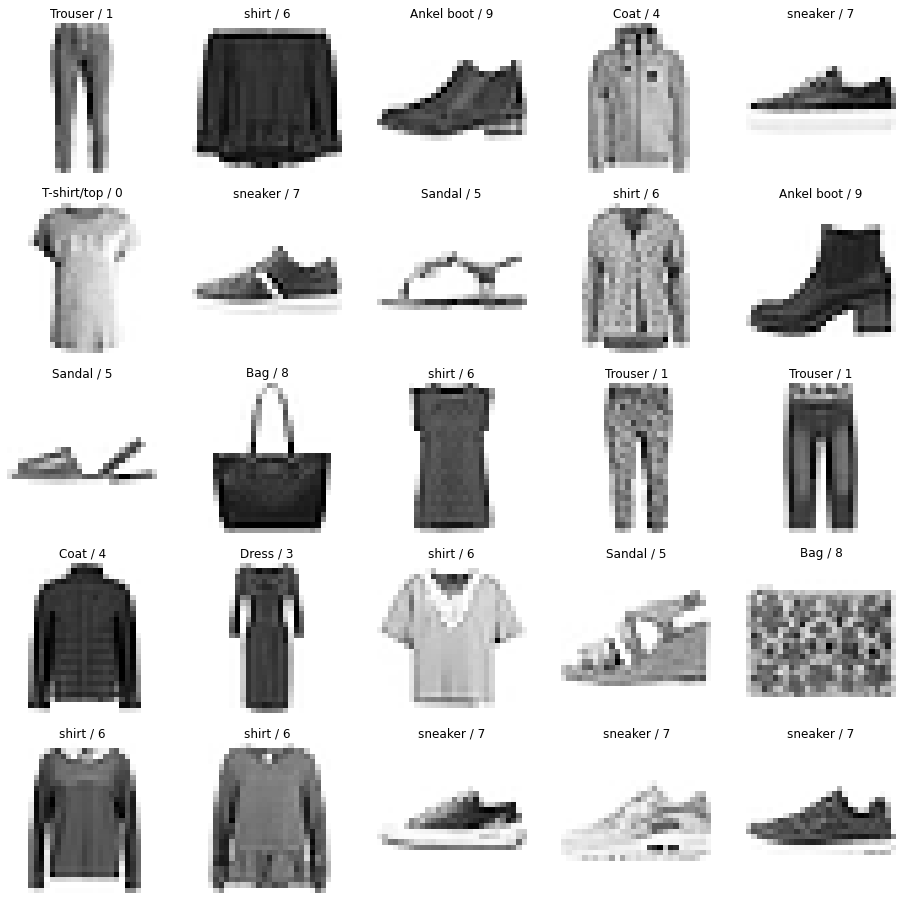

In [8]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_train[i],cmap='Greys')
    plt.axis('off')
    plt.title('{} / {}'. format(class_labels[y_train[i]],y_train[i]))

In [9]:
X_train.ndim

3

In [11]:
# expanding the dimensions
X_train = np.expand_dims(X_train,-1)
X_train.ndim
X_test = np.expand_dims(X_test,-1)
X_test.ndim

4

In [12]:
# feature scaling
X_train = X_train/255
X_test = X_test/255

In [13]:
# split dataset
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation = train_test_split(X_train,y_train,test_size=0.2,random_state=2020)
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1, 1), (12000, 28, 28, 1, 1), (48000,), (12000,))

# BUILDING CNN MODEL

In [19]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.05, 0.02, 0.  ]], dtype=float32)

In [23]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 35s 166ms/step - loss: 0.9354 - accuracy: 0.6950 - val_loss: 0.4124 - val_accuracy: 0.8605
Epoch 2/10
94/94 [==============================] - 13s 142ms/step - loss: 0.3868 - accuracy: 0.8638 - val_loss: 0.3755 - val_accuracy: 0.8674
Epoch 3/10
94/94 [==============================] - 13s 142ms/step - loss: 0.3437 - accuracy: 0.8818 - val_loss: 0.3394 - val_accuracy: 0.8806
Epoch 4/10
94/94 [==============================] - 13s 142ms/step - loss: 0.3028 - accuracy: 0.8929 - val_loss: 0.3164 - val_accuracy: 0.8849
Epoch 5/10
94/94 [==============================] - 13s 139ms/step - loss: 0.2798 - accuracy: 0.9010 - val_loss: 0.2942 - val_accuracy: 0.8974
Epoch 6/10
94/94 [==============================] - 14s 145ms/step - loss: 0.2643 - accuracy: 0.9054 - val_loss: 0.2871 - val_accuracy: 0.8982
Epoch 7/10
94/94 [==============================] - 13s 135ms/step - loss: 0.2383 - accuracy: 0.9170 - val_loss: 0.2848 - val_accuracy: 0.8995

In [25]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2794 - accuracy: 0.8979


[0.27939119935035706, 0.8978999853134155]

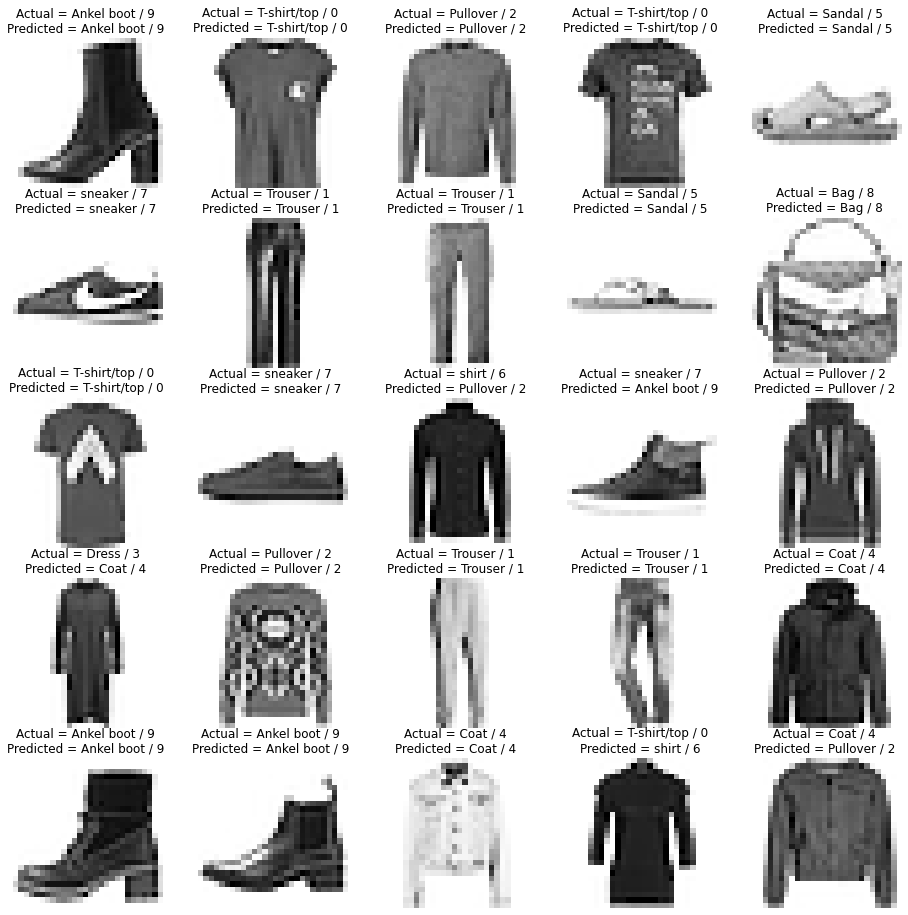

In [27]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {} '. format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')

# confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.91      0.84      1000
       Dress       0.92      0.89      0.91      1000
        Coat       0.85      0.82      0.83      1000
      Sandal       0.96      0.98      0.97      1000
       shirt       0.77      0.65      0.70      1000
     sneaker       0.96      0.95      0.95      1000
         Bag       0.99      0.97      0.98      1000
  Ankel boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



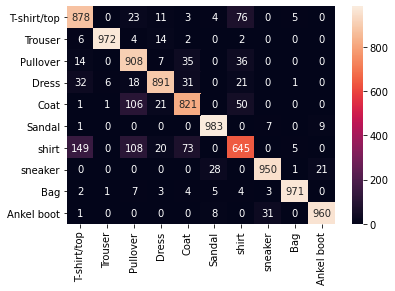

In [29]:
sns.heatmap(cm,annot =True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

# save model

In [30]:
model.save('fashion_mnist_cnn_model.h5')

# BUILD 2 COMPLEX CNN

In [31]:
#building CNN model
cnn_model2=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [32]:
# compile the model
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
# train the model
cnn_model2.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/20
94/94 [==============================] - 18s 172ms/step - loss: 1.4866 - accuracy: 0.4429 - val_loss: 0.5777 - val_accuracy: 0.7696
Epoch 2/20
94/94 [==============================] - 17s 176ms/step - loss: 0.5691 - accuracy: 0.7854 - val_loss: 0.4502 - val_accuracy: 0.8326
Epoch 3/20
94/94 [==============================] - 16s 170ms/step - loss: 0.4719 - accuracy: 0.8259 - val_loss: 0.4075 - val_accuracy: 0.8505
Epoch 4/20
94/94 [==============================] - 16s 168ms/step - loss: 0.4122 - accuracy: 0.8480 - val_loss: 0.3766 - val_accuracy: 0.8606
Epoch 5/20
94/94 [==============================] - 16s 175ms/step - loss: 0.3833 - accuracy: 0.8596 - val_loss: 0.3634 - val_accuracy: 0.8684
Epoch 6/20
94/94 [==============================] - 16s 167ms/step - loss: 0.3503 - accuracy: 0.8707 - val_loss: 0.3339 - val_accuracy: 0.8761
Epoch 7/20
94/94 [==============================] - 17s 179ms/step - loss: 0.3312 - accuracy: 0.8779 - val_loss: 0.3234 - val_accuracy: 0.8809

In [34]:
#save the model
cnn_model2.save('fashion_mnist_cnn_model2.h5')

#  BUILDING MORE COMPLEX MODEL

In [35]:
cnn_model3=keras.models.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=10,activation='softmax')
])

In [37]:
# compiling the model
cnn_model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
# training the model
cnn_model3.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 37s 370ms/step - loss: 1.6741 - accuracy: 0.3385 - val_loss: 0.6456 - val_accuracy: 0.7488
Epoch 2/10
94/94 [==============================] - 36s 382ms/step - loss: 0.6510 - accuracy: 0.7508 - val_loss: 0.4876 - val_accuracy: 0.8158
Epoch 3/10
94/94 [==============================] - 35s 373ms/step - loss: 0.5122 - accuracy: 0.8102 - val_loss: 0.4294 - val_accuracy: 0.8385
Epoch 4/10
94/94 [==============================] - 33s 354ms/step - loss: 0.4365 - accuracy: 0.8407 - val_loss: 0.3641 - val_accuracy: 0.8677
Epoch 5/10
94/94 [==============================] - 32s 342ms/step - loss: 0.3778 - accuracy: 0.8632 - val_loss: 0.3504 - val_accuracy: 0.8752
Epoch 6/10
94/94 [==============================] - 32s 343ms/step - loss: 0.3449 - accuracy: 0.8771 - val_loss: 0.3567 - val_accuracy: 0.8692
Epoch 7/10
94/94 [==============================] - 32s 343ms/step - loss: 0.3283 - accuracy: 0.8826 - val_loss: 0.3077 - val_accuracy: 0.8907

In [39]:
# saving the model
cnn_model3.save('fashion_mnist_cnn_model3.h5')